In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define the CNN model
def create_cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [ ]:
# Compile and train the model
cnn = create_cnn()
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 61ms/step - accuracy: 0.8574 - loss: 0.4515 - val_accuracy: 0.9843 - val_loss: 0.0476
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.9837 - loss: 0.0547 - val_accuracy: 0.9866 - val_loss: 0.0412
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.9887 - loss: 0.0367 - val_accuracy: 0.9892 - val_loss: 0.0328
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 64ms/step - accuracy: 0.9911 - loss: 0.0276 - val_accuracy: 0.9901 - val_loss: 0.0338
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.9933 - loss: 0.0221 - val_accuracy: 0.9878 - val_loss: 0.0385


In [ ]:
# Evaluate the model
test_loss, test_acc = cnn.evaluate(test_images, test_labels, verbose=2)
print(f'CNN Test Accuracy: {test_acc:.4f}')

313/313 - 3s - 9ms/step - accuracy: 0.9878 - loss: 0.0385
CNN Test Accuracy: 0.9878


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


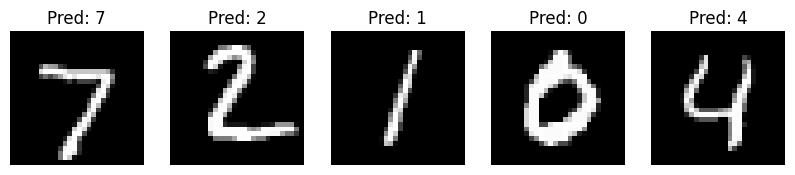

In [ ]:
# Display a few test images and predictions
predictions = cnn.predict(test_images[:5])
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(test_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {predictions[i].argmax()}')
    ax.axis('off')
plt.show()
